In [1]:
# Importing required modules to view data in csv file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix, accuracy_score
import joblib

%matplotlib inline

dataset = pd.read_csv('heart.csv')


# data peeking
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Luckily categorical data in this dataset has been assigned numerical values on our behalf.
Below are the informations regarding values in individual columns

Age : Age of the patient

Sex : Sex of the patient (1:male, 0: female)

cp : Chest Pain type 
chest pain types
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic
        
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

caa: number of major vessels (0-3)

target : 0= less chance of heart attack 1= more chance of heart attack



In [2]:
# describing the loaded dataset to view specific properties of each column
dataset.describe()

# mean age observed in the dataset lies at 54 
# minimum age of 29 suggest recorded patients observed possess signs 
# maximum age of 77 suggest age prone to developing a heart attack
# but such observations are left as hyothesis till exploratory data analysis



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Next is to observe the datatype present in dataset at a glance i.e categorical, numerical and ordinal

In [3]:
#using pandas .info() function to generate general summary of table properties
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Now data types have been confirmed next operation would be to check if null rows exist in columns and whether to fill or drop such rows found.

In [4]:
# checking for null cells in each column
missing_data = dataset.isnull().sum().to_frame()

# naming column holding the sums of null cells 
missing_data = missing_data.rename(columns={0:"Empty rows"})
print(missing_data)

          Empty rows
age                0
sex                0
cp                 0
trtbps             0
chol               0
fbs                0
restecg            0
thalachh           0
exng               0
oldpeak            0
slp                0
caa                0
thall              0
output             0


No null rows found in columns moving on, we check the relationship between columns and label data(output) to discover potential features which could be factors that dictate label outcome.

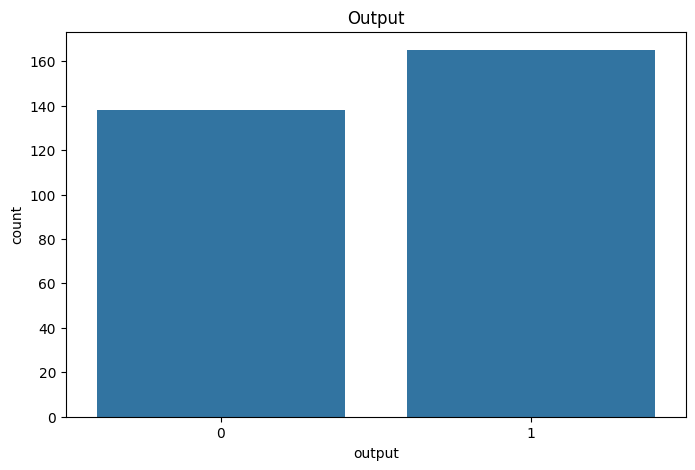

In [5]:
# first lets see the occurences of our label



plt.figure(figsize=(8, 5))
sns.countplot(x = 'output', data=dataset)
plt.title('Output')
plt.show()

# Count plot gives an insight that there are higher numbers of heart attack cases
# which could be attributed to specific features being higher or lower.

In [6]:
# view correlations to see relationship btw each column in this dataset

dataset.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


The correlations table above show that no strong correlation exists between feature columns and 
output(label). weak correlations btw 4 features and the output(cp, thalach, exng, oldpeak), # plot a *heat map* to better visualize correlations

<Axes: >

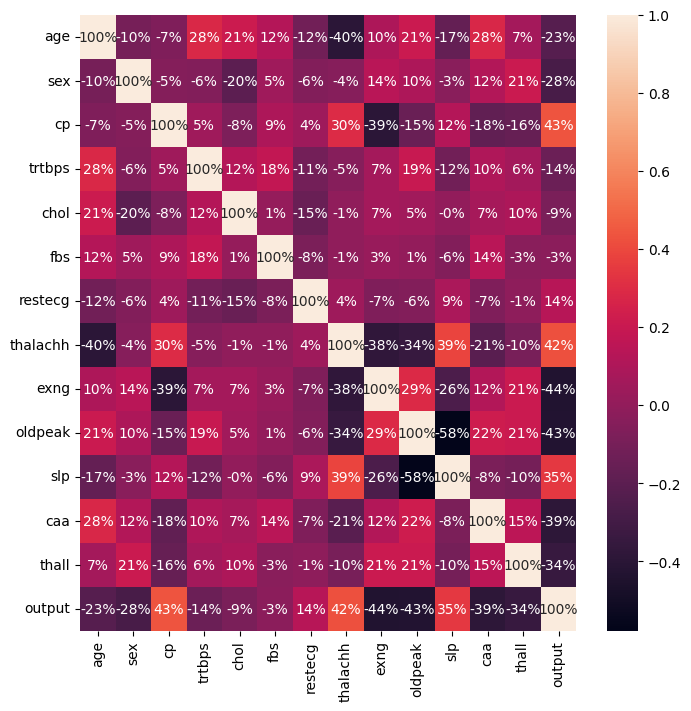

In [7]:
# now for the heatmap

plt.figure(figsize=(8,8))
sns.heatmap(dataset.iloc[:, :].corr(), annot=True, fmt='.0%')

Data visualized by heatmap explains higher occurences of negative correlation btw each columns and also slight positive correlations.
This indicates for Diagnosis(output to be positve or negative) depends on a combination of feature values areas

In [8]:
# create test and train datasets by set
# split dataset to a 80 - 20 split(tran , test)
train_data, test_data = train_test_split(dataset, test_size=0.20, random_state=42)

train_data


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [9]:
# Creating a function random forest which will help determine best hyperparameters to use

def Random_forest(train_data, test_data):
    """_summary_
        This is a function defined to help chose the best hyperparameters
        to train a modle with, it uses GridSearchCV which helps automate the 
        process of hyperparameter tuning.
        This helps speed up final model development faster
        features variable has no column save for output is dropped to train test models
    Args:
        train_data (var): This variable contains the data used to train
                                the models developed in this function based on hyperparameters.
        test_data (var): This variable contains data used to test the models
                            trained in this function based on hyperparameters.

    Returns:
        best_model: the model with the optimum scores
    """
    # Exclude 'output' from the features
    features = [c for c in train_data.columns if c != "output"]
    
    # define parameters for GridSerchCV to work with
    params = {
        'n_estimators': [2, 5, 10],
        'criterion' : ['gini', 'entropy'],
        'max_depth' :  [None, 10, 20, 30],
        'min_samples_split' : [2, 5, 10]
    }
    
    # Initialize the RandomForest model with hyperparameters
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, 
                               scoring='balanced_accuracy') 
    grid_search.fit(train_data[features], train_data['output'])

    # Best parameters and corresponding accuracy 
    print(f'Best parameters: {grid_search.best_params_}') 
    print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')
            
    # Train model with best parameters on the entire training set
    best_model = grid_search.best_estimator_ 
    best_model.fit(train_data[features], train_data['output']) 
    # Evaluate model on test set 
    test_predictions = best_model.predict(test_data[features]) 
    test_accuracy = balanced_accuracy_score(test_data['output'], test_predictions)
    
    print(f"Balanced accuracy score: {test_accuracy}")
    
    #Print confusion matrix and classification report 
    print("Confusion Matrix:") 
    print(confusion_matrix(test_data['output'], test_predictions)) 
    print("\nClassification Report:") 
    print(classification_report(test_data['output'], test_predictions))
    
    return best_model

# Call the function with train and test datasets
model1 = Random_forest(train_data, test_data)


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Best cross-validation accuracy: 0.8380
Balanced accuracy score: 0.8545258620689655
Confusion Matrix:
[[26  3]
 [ 6 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



Results shown above after model hyperparameters finetuning achieve an accuracy score of 85%
Confusion Matrix shows the best model had 26 true positives, 26 true negatives, 3 false positives,
6 false negatives,
Classification report:
class 0(no heart attack): 81% instances of model prediction as 0 is actually 0(precision)
                            90% of identified class as actual 0(recall),
                            harmonic mean or precision and recall for balanced measure(f1-score)
class 1(heart attack): 90% instances of model prediction as 1 is actually 1(precision)
                            81% of identified class as actual 1(recall),
                            harmonic mean or precision and recall for balanced measure(f1-score)

Revisiting heatmap lets see if we can finetune for false negatives by dropping columns with less than 20% influence on output


In [10]:
# Creating a function random forest which will help determine best hyperparameters to use

def Random_forest(train_data, test_data):
    """_summary_
        This is a function defined to help chose the best hyperparameters
        to train a modle with, it uses GridSearchCV which helps automate the 
        process of hyperparameter tuning.
        This helps speed up final model development faster
        three other columns save for output will be excluded based on heatmap correlation
        observed 
    Args:
        train_data (var): This variable contains the data used to train
                                the models developed in this function based on hyperparameters.
        test_data (var): This variable contains data used to test the models
                            trained in this function based on hyperparameters.

    Returns:
        best_model: the model with the optimum scores
    """
    # Exclude 'output' from the features
    features = [c for c in train_data.columns if c not in ["output", "trtbps","chol", "fbs"]]
    
    # define parameters for GridSerchCV to work with
    params = {
        'n_estimators': [2, 5, 10],
        'criterion' : ['gini', 'entropy'],
        'max_depth' :  [None, 10, 20, 30],
        'min_samples_split' : [2, 5, 10]
    }
    
    # Initialize the RandomForest model with hyperparameters
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, 
                               scoring='balanced_accuracy') 
    grid_search.fit(train_data[features], train_data['output'])

    # Best parameters and corresponding accuracy 
    print(f'Best parameters: {grid_search.best_params_}') 
    print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')
            
    # Train model with best parameters on the entire training set
    best_model = grid_search.best_estimator_ 
    best_model.fit(train_data[features], train_data['output']) 
    # Evaluate model on test set 
    test_predictions = best_model.predict(test_data[features]) 
    test_accuracy = balanced_accuracy_score(test_data['output'], test_predictions)
    
    print(f"Balanced accuracy score: {test_accuracy}")
    
    #Print confusion matrix and classification report 
    print("Confusion Matrix:") 
    print(confusion_matrix(test_data['output'], test_predictions)) 
    print("\nClassification Report:") 
    print(classification_report(test_data['output'], test_predictions))
    
    return best_model

# Call the function with train and test datasets
model2 = Random_forest(train_data, test_data)


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 10}
Best cross-validation accuracy: 0.8202
Balanced accuracy score: 0.8701508620689655
Confusion Matrix:
[[26  3]
 [ 5 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [11]:
# Using best model on test_data 

features = [c for c in dataset.columns if c!= 'output']
predictions = model1.predict(test_data[features])

results = pd.DataFrame({'Predicted Outputs': predictions,
                        'Actual Outputs': test_data['output']})

print("Model1 predictions vs actual outputs\n\n\n")
print(results)


Model1 predictions vs actual outputs



     Predicted Outputs  Actual Outputs
179                  0               0
228                  0               0
111                  1               1
246                  0               0
60                   1               1
..                 ...             ...
249                  0               0
104                  1               1
300                  0               0
193                  0               0
184                  0               0

[61 rows x 2 columns]


In [12]:
# Using best model on test_data 

features = [c for c in dataset.columns if c not in ["output", "chol", "fbs","trtbps"]]
print(features)
predictions = model2.predict(test_data[features])

results = pd.DataFrame({'Predicted Outputs': predictions,
                        'Actual Outputs': test_data['output']})

print("Model2 predictions vs actual outputs\n\n\n")
print(results)


['age', 'sex', 'cp', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
Model2 predictions vs actual outputs



     Predicted Outputs  Actual Outputs
179                  0               0
228                  0               0
111                  0               1
246                  0               0
60                   1               1
..                 ...             ...
249                  0               0
104                  1               1
300                  0               0
193                  0               0
184                  0               0

[61 rows x 2 columns]


Based on metrics used for both models model2 may have slightly lower cross validation accuracy but its higher precision, recall, F1-Score and overall accuracy outweigh making it better overall

Now to save Trained Model for later use

In [16]:
model_filename = "ModelHeart.pkl"
joblib.dump(model2, model_filename)
print("Model Saved")

Model Saved
['age' 'sex' 'cp' 'restecg' 'thalachh' 'exng' 'oldpeak' 'slp' 'caa'
 'thall']


*Cheers!!!!*